In [5]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
## buld dlib
!git clone https://github.com/davisking/dlib.git
cd /content/dlib/
!mkdir build



Cloning into 'dlib'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 48595 (delta 37), reused 17 (delta 8), pack-reused 48532
Receiving objects: 100% (48595/48595), 23.12 MiB | 26.87 MiB/s, done.
Resolving deltas: 100% (34322/34322), done.
/bin/bash: line 0: cd: /content/dlib/build: No such file or directory
CMake Error: The source directory "/" does not appear to contain CMakeLists.txt.
Specify --help for usage, or press the help button on the CMake GUI.
Error: could not load cache
python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [3]:
cd /content/dlib/build

/content/dlib/build


In [4]:
!cmake .. -DDLIB_USE_CUDA=1 -DUSE_AVX_INSTRUCTIONS=1
!cmake --build .


-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Using CMake version: 3.12.0
-- Compiling dlib version: 19.21.99
-- Enabling AVX instructions
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Looking for pthread_create in pthread - 

In [ ]:
cd /content/dlib/
!python setup.py install --yes USE_AVX_INSTRUCTIONS --yes DLIB_USE_CUDA

In [ ]:
!pip install dlib

In [6]:
pip install face_recognition

In [7]:
!pip install imutils

# encode face


In [8]:
from imutils import paths
import face_recognition
import argparse
import pickle
import cv2
import os

In [9]:
dataset = "/content/drive/My Drive/face-recong/dataset/"

In [10]:
encodings_path = path+"encodings_v1.pickle"

In [11]:
# grab the paths to the input images in our dataset
print("[INFO] quantifying faces...")
imagePaths = list(paths.list_images(dataset))

# initialize the list of known encodings and known names
knownEncodings = []
knownNames = []


[INFO] quantifying faces...


In [12]:
# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
	# extract the person name from the image path
	print("[INFO] processing image {}/{}".format(i + 1,
		len(imagePaths)))
	name = imagePath.split(os.path.sep)[-2]

	# load the input image and convert it from RGB (OpenCV ordering)
	# to dlib ordering (RGB)
	image = cv2.imread(imagePath)
	rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

	# detect the (x, y)-coordinates of the bounding boxes
	# corresponding to each face in the input image
	boxes = face_recognition.face_locations(rgb,
		model="cnn")

	# compute the facial embedding for the face
	encodings = face_recognition.face_encodings(rgb, boxes)

	# loop over the encodings
	for encoding in encodings:
		# add each encoding + name to our set of known names and
		# encodings
		knownEncodings.append(encoding)
		knownNames.append(name)

[INFO] processing image 1/107
[INFO] processing image 2/107
[INFO] processing image 3/107
[INFO] processing image 4/107
[INFO] processing image 5/107
[INFO] processing image 6/107
[INFO] processing image 7/107
[INFO] processing image 8/107
[INFO] processing image 9/107
[INFO] processing image 10/107
[INFO] processing image 11/107
[INFO] processing image 12/107
[INFO] processing image 13/107
[INFO] processing image 14/107
[INFO] processing image 15/107
[INFO] processing image 16/107
[INFO] processing image 17/107
[INFO] processing image 18/107
[INFO] processing image 19/107
[INFO] processing image 20/107
[INFO] processing image 21/107
[INFO] processing image 22/107
[INFO] processing image 23/107
[INFO] processing image 24/107
[INFO] processing image 25/107
[INFO] processing image 26/107
[INFO] processing image 27/107
[INFO] processing image 28/107
[INFO] processing image 29/107
[INFO] processing image 30/107
[INFO] processing image 31/107
[INFO] processing image 32/107
[INFO] processing

In [13]:
print("[INFO] serializing encodings...")
data = {"encodings": knownEncodings, "names": knownNames}
f = open(encodings_path, "wb")
f.write(pickle.dumps(data))
f.close()

[INFO] serializing encodings...


 completion of encoding task

# face detect

In [14]:
import pickle
import cv2
import dlib

In [15]:
dlib.DLIB_USE_CUDA = True

In [16]:
data = pickle.loads(open(encodings_path, "rb").read())

In [37]:
test_image = "/content/drive/My Drive/face-recong/example/mr.JPG"

In [38]:
# load the input image and convert it from BGR to RGB
image = cv2.imread(test_image)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# detect the (x, y)-coordinates of the bounding boxes corresponding
# to each face in the input image, then compute the facial embeddings
# for each face
print("[INFO] recognizing faces...")
boxes = face_recognition.face_locations(rgb,model="cnn")
encodings = face_recognition.face_encodings(rgb, boxes)

# initialize the list of names for each face detected
names = []

[INFO] recognizing faces...


In [39]:
# loop over the facial embeddings
for encoding in encodings:
	# attempt to match each face in the input image to our known
	# encodings
	matches = face_recognition.compare_faces(data["encodings"],
		encoding)
	name = "Unknown"

	# check to see if we have found a match
	if True in matches:
		# find the indexes of all matched faces then initialize a
		# dictionary to count the total number of times each face
		# was matched
		matchedIdxs = [i for (i, b) in enumerate(matches) if b]
		counts = {}

		# loop over the matched indexes and maintain a count for
		# each recognized face face
		for i in matchedIdxs:
			name = data["names"][i]
			counts[name] = counts.get(name, 0) + 1

		# determine the recognized face with the largest number of
		# votes (note: in the event of an unlikely tie Python will
		# select first entry in the dictionary)
		name = max(counts, key=counts.get)
	
	# update the list of names
	names.append(name)

# loop over the recognized faces
for ((top, right, bottom, left), name) in zip(boxes, names):
	# draw the predicted face name on the image
	cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
	y = top - 15 if top - 15 > 15 else top + 15
	cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,
		0.75, (0, 255, 0), 2)

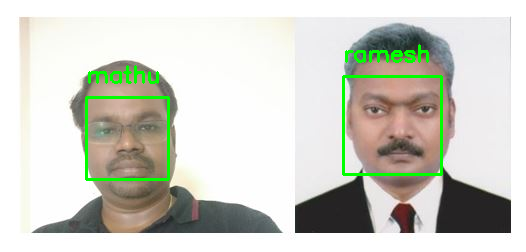

-1

In [40]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)
cv2.waitKey(0)